# JD filtering

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from astropy.coordinates import SkyCoord
from functools import partial
import os
os.chdir('/home/jovyan/work/src')
import do_charts_vast
import reading
import utils
from star_description import StarDescription

%matplotlib inline
plt.style.use('seaborn')
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

## Supporting functions

In [3]:
def massage_df_for_phase_plot(df: DataFrame):
    df['floatJD'] = df['JD'].astype(np.float)
    df['realV'] = df['Vrel']
    df['realErr'] = df['err']
    return df

In [53]:
def read_light_curve(star_id):
    df = reading.read_lightcurve_vast(f"../tests/data/outliers/out{star_id:05}.dat")
    return massage_df_for_phase_plot(df)
 
def plot_star(star_id, jdfilters):
    df = read_light_curve(star_id)
    if jdfilters is not None:
        df = df[(df.floatJD <= jdfilters[0]) | (df.floatJD >= jdfilters[1])]
    return plot_star_df(star_id, df, None)

def plot_star_df(star_id, df, cleaning_func):
    star = StarDescription(local_id=star_id, coords=SkyCoord(ra=5.6, dec=-72, unit='deg'))
    print("curve before cleaning:", len(df))
    period = do_charts_vast.calculate_ls_period_from_df(df)
    print("using period", period)
    plt, t, lc = do_charts_vast.plot_lightcurve_raw(star, df, "bla", write_plot=False)
    print("curve after cleaning:", len(lc))
    plt.show()
    return t, lc

def none_phase_filter(time, lc):
    return time, lc

## Reading light curves

In [54]:
test_curve = read_light_curve(3855)
print(len(test_curve))
test_curve['floatJD'].describe()

8086


count    8.086000e+03
mean     2.456792e+06
std      1.138853e+02
min      2.456679e+06
25%      2.456722e+06
50%      2.456743e+06
75%      2.456781e+06
max      2.457024e+06
Name: floatJD, dtype: float64

df describe               Vrel          err            X            Y    aperture?  \
count  7047.000000  7047.000000  7047.000000  7047.000000  7047.000000   
mean     -9.307780     0.049722   470.151522   768.342684     5.882262   
std       0.128402     0.015145   440.526655   209.522280     0.560590   
min      -9.776130     0.025100   128.738600   281.827910     4.800000   
25%      -9.410344     0.037800   156.820750   468.040405     5.500000   
50%      -9.329895     0.047200   233.443600   850.497620     5.700000   
75%      -9.212748     0.059300  1083.143250   936.695650     6.200000   
max      -8.799410     0.161700  1203.227420  1025.805540     8.300000   

            floatJD        realV      realErr  
count  7.047000e+03  7047.000000  7047.000000  
mean   2.456804e+06    -9.307780     0.049722  
std    1.173315e+02     0.128402     0.015145  
min    2.456679e+06    -9.776130     0.025100  
25%    2.456732e+06    -9.410344     0.037800  
50%    2.456752e+06    -9.329895 

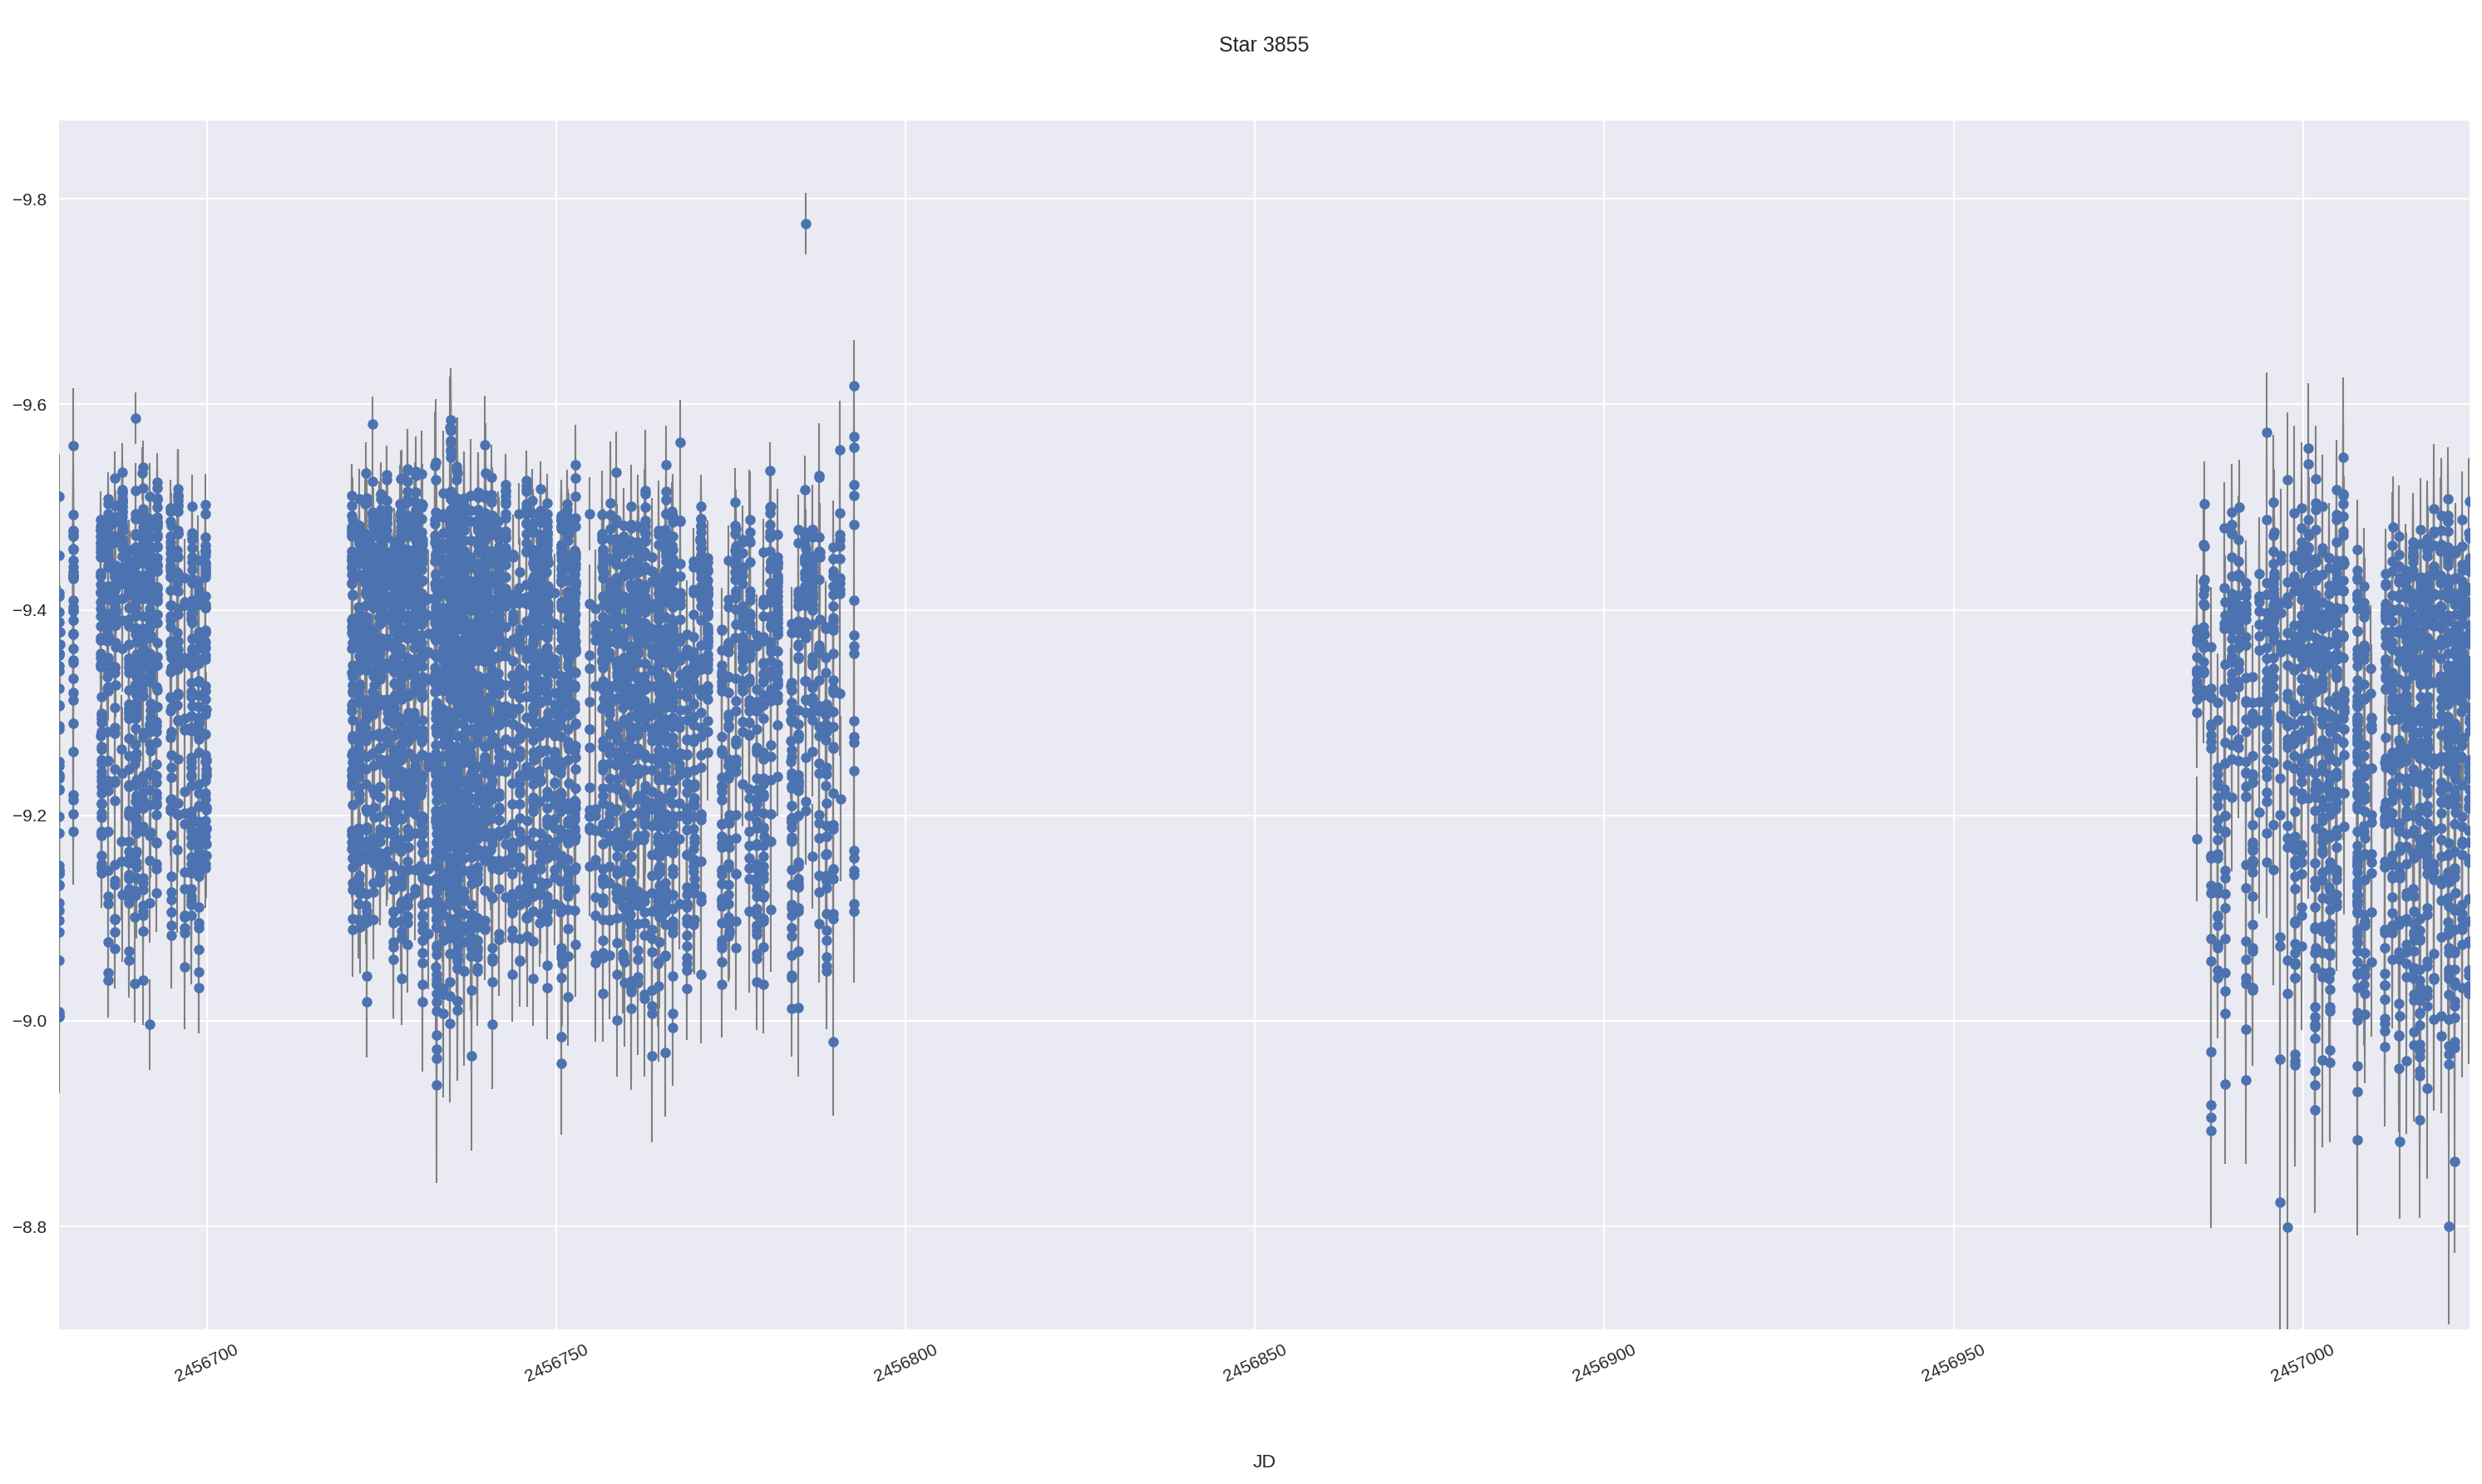

In [55]:
stars = [3855, 7668, 9235]
one_star = [3855]
t=[]
lc=[]
def plot_stars(stars, outlier_func):
    for star in stars:
        t, lc = plot_star(star, [2456700.0, 2456720.0])

%time plot_stars(one_star, none_phase_filter)